In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Read the CSV file
data = pd.read_csv('/Users/cyrusachtari/Desktop/UBS-ZebraByte/data/skylab_instagram_datathon_dataset.csv', delimiter=';')

In [3]:
data.head()

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0


In [4]:
for column in data.select_dtypes(include='object').columns:
    unique_values = data[column].unique()
    print(f"Unique values for column {column}: {unique_values}")


Unique values for column period: ['Weekly']
Unique values for column period_end_date: ['2019-12-07' '2021-01-30' '2016-05-14' '2019-04-20' '2023-03-25'
 '2019-11-23' '2017-08-19' '2019-02-16' '2020-05-30' '2020-03-07'
 '2015-03-28' '2016-04-09' '2016-06-25' '2021-10-23' '2017-04-29'
 '2020-03-14' '2020-12-05' '2018-10-13' '2017-02-04' '2017-04-01'
 '2023-01-21' '2018-05-12' '2015-10-17' '2019-01-05' '2021-04-10'
 '2015-09-05' '2015-03-14' '2016-04-02' '2019-04-13' '2019-06-29'
 '2020-07-04' '2021-04-17' '2019-07-27' '2021-03-13' '2019-12-21'
 '2022-11-19' '2019-07-13' '2017-01-14' '2015-11-07' '2016-07-23'
 '2018-08-25' '2020-06-20' '2015-01-03' '2020-02-29' '2015-04-11'
 '2020-12-26' '2017-11-25' '2019-08-03' '2023-04-15' '2016-10-22'
 '2017-09-16' '2022-02-05' '2017-05-06' '2016-05-07' '2017-09-09'
 '2021-03-20' '2018-07-21' '2023-03-18' '2020-01-04' '2021-06-19'
 '2016-11-19' '2023-04-08' '2022-04-23' '2021-08-14' '2022-04-09'
 '2023-09-09' '2016-08-13' '2021-05-15' '2019-11-30' '20

In [5]:
compset_group_counts = data['compset_group'].value_counts()
print(compset_group_counts)

compset_group
Luxury & Premium & Mainstream    216241
Apparel Retail                   209573
Sportswear & Athleisure           57068
Beauty & Boutique                 44266
Food Products                     42612
Beverages                         41471
Restaurants                       37599
Outdoor Gear                       9536
Fitness & Exercise                 8978
Dermatology and Orthodontics       7819
Mattress                           5107
Petcare                            4896
Building Products                  4376
Sporting Goods                     3185
Home Appliances                    3013
Food Retail                        2574
Toys & Collectibles                2229
Discount Retailers                 2100
Entertainment                      1215
Study (All Brands)                  455
Name: count, dtype: int64


In [6]:
unique_values = data['calculation_type'].unique()
print(f"Unique values for column 'business_entity_doing_business_as_name': {unique_values}")
print()


Unique values for column 'business_entity_doing_business_as_name': ['Metric Value']



In [7]:
ca_values = data[data['business_entity_doing_business_as_name'].str.startswith('C&A')]['business_entity_doing_business_as_name'].unique()
print(ca_values)


['C&A Brasil' 'C&A']


In [8]:
print(data[data['business_entity_doing_business_as_name'] == 'C&A'].head(1))
print(data[data['business_entity_doing_business_as_name'] == 'C&A Brasil'].head(1))


       period period_end_date   compset_group                     compset  \
39266  Weekly      2018-03-10  Apparel Retail  Omnichannel Apparel Retail   

      business_entity_doing_business_as_name legal_entity_name  \
39266                                    C&A  COFRA Holding AG   

      domicile_country_name ultimate_parent_legal_entity_name  \
39266                   NaN                  COFRA Holding AG   

      primary_exchange_name calculation_type  followers  pictures  videos  \
39266                   NaN     Metric Value   489271.0      54.0    11.0   

       comments     likes  
39266     680.0  104227.0  
       period period_end_date   compset_group               compset  \
37446  Weekly      2015-06-06  Apparel Retail  Latam Apparel Retail   

      business_entity_doing_business_as_name legal_entity_name  \
37446                             C&A Brasil      C&A MODAS SA   

      domicile_country_name ultimate_parent_legal_entity_name  \
37446                Brazil  

In [9]:
unique_dates = data['period_end_date'].unique()
unique_dates.sort()
for date in unique_dates:
    print(date)


2015-01-03
2015-01-10
2015-01-17
2015-01-24
2015-01-31
2015-02-07
2015-02-14
2015-02-21
2015-02-28
2015-03-07
2015-03-14
2015-03-21
2015-03-28
2015-04-04
2015-04-11
2015-04-18
2015-04-25
2015-05-02
2015-05-09
2015-05-16
2015-05-23
2015-05-30
2015-06-06
2015-06-13
2015-06-20
2015-06-27
2015-07-04
2015-07-11
2015-07-18
2015-07-25
2015-08-01
2015-08-08
2015-08-15
2015-08-22
2015-08-29
2015-09-05
2015-09-12
2015-09-19
2015-09-26
2015-10-03
2015-10-10
2015-10-17
2015-10-24
2015-10-31
2015-11-07
2015-11-14
2015-11-21
2015-11-28
2015-12-05
2015-12-12
2015-12-19
2015-12-26
2016-01-02
2016-01-09
2016-01-16
2016-01-23
2016-01-30
2016-02-06
2016-02-13
2016-02-20
2016-02-27
2016-03-05
2016-03-12
2016-03-19
2016-03-26
2016-04-02
2016-04-09
2016-04-16
2016-04-23
2016-04-30
2016-05-07
2016-05-14
2016-05-21
2016-05-28
2016-06-04
2016-06-11
2016-06-18
2016-06-25
2016-07-02
2016-07-09
2016-07-16
2016-07-23
2016-07-30
2016-08-06
2016-08-13
2016-08-20
2016-08-27
2016-09-03
2016-09-10
2016-09-17
2016-09-24

In [10]:
# Créer une liste de toutes les dates de fin de semaine de janvier 2015 à décembre 2023
all_weekend_dates = pd.date_range(start='2015-01-03', end='2023-09-16', freq='W-SAT')

# Convertir les dates uniques en datetime pour la comparaison
unique_dates = pd.to_datetime(unique_dates)

# Vérifier si chaque date de la liste est présente dans unique_dates
missing_dates = [date for date in all_weekend_dates if date not in unique_dates]

print(missing_dates)
# Imprimer les dates manquantes
for date in missing_dates:
    print(date)

[]


In [11]:
# Grouper les données par 'brand' et 'compset_group'
grouped = data.groupby(['business_entity_doing_business_as_name', 'compset_group'])

missing_dates_by_group = {}

# Pour chaque groupe, vérifier si toutes les dates existent
for name, group in grouped:
    unique_dates = pd.to_datetime(group['period_end_date'].unique())
    missing_dates = [date for date in all_weekend_dates if date not in unique_dates]
    missing_dates_by_group[name] = missing_dates

# Imprimer les dates manquantes pour chaque groupe
for group, missing_dates in missing_dates_by_group.items():
    print(f"Pour le groupe {group}, les dates manquantes sont : {missing_dates}")
    #for date in missing_dates:
        #print(date)

Pour le groupe ('24S', 'Apparel Retail'), les dates manquantes sont : [Timestamp('2015-01-03 00:00:00'), Timestamp('2015-01-10 00:00:00'), Timestamp('2015-01-17 00:00:00'), Timestamp('2015-01-24 00:00:00'), Timestamp('2015-01-31 00:00:00'), Timestamp('2015-02-07 00:00:00'), Timestamp('2015-02-14 00:00:00'), Timestamp('2015-02-21 00:00:00'), Timestamp('2015-02-28 00:00:00'), Timestamp('2015-03-07 00:00:00'), Timestamp('2015-03-14 00:00:00'), Timestamp('2015-03-21 00:00:00'), Timestamp('2015-03-28 00:00:00'), Timestamp('2015-04-04 00:00:00'), Timestamp('2015-04-11 00:00:00'), Timestamp('2015-04-18 00:00:00'), Timestamp('2015-04-25 00:00:00'), Timestamp('2015-05-02 00:00:00'), Timestamp('2015-05-09 00:00:00'), Timestamp('2015-05-16 00:00:00'), Timestamp('2015-05-23 00:00:00'), Timestamp('2015-05-30 00:00:00'), Timestamp('2015-06-06 00:00:00'), Timestamp('2015-06-13 00:00:00'), Timestamp('2015-06-20 00:00:00'), Timestamp('2015-06-27 00:00:00'), Timestamp('2015-07-04 00:00:00'), Timestamp('

In [26]:
def plot_brand(data, brand='Versace', compset='Soft Luxury', metric='likes'):
    # Extraire les lignes pour la marque et le compset spécifiés et les trier par 'period_end_date', puis tracer la métrique au fil du temps
    subset = data[(data['business_entity_doing_business_as_name'] == brand) & (data['compset'] == compset)]
    
    # Convertir 'period_end_date' en datetime
    subset.loc[:, 'period_end_date'] = pd.to_datetime(subset['period_end_date'])
    
    subset = subset.sort_values('period_end_date')
    
    fig, ax = plt.subplots()
    ax.plot(subset['period_end_date'], subset[metric])
    
    # Définir le format de l'axe des x pour afficher une marque tous les 3 mois
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    # Rendre les labels de l'axe des x verticaux
    plt.xticks(rotation='vertical')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.title(f'{metric} for {brand} in the {compset} compset group')
    plt.show()

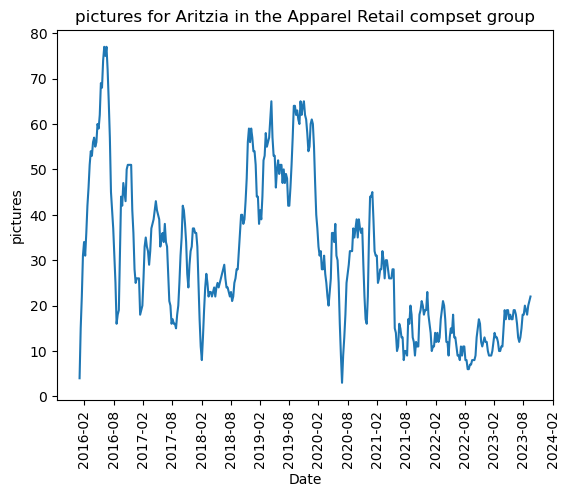

In [28]:
plot_brand(data, brand='Aritzia', compset='Apparel Retail', metric='pictures')

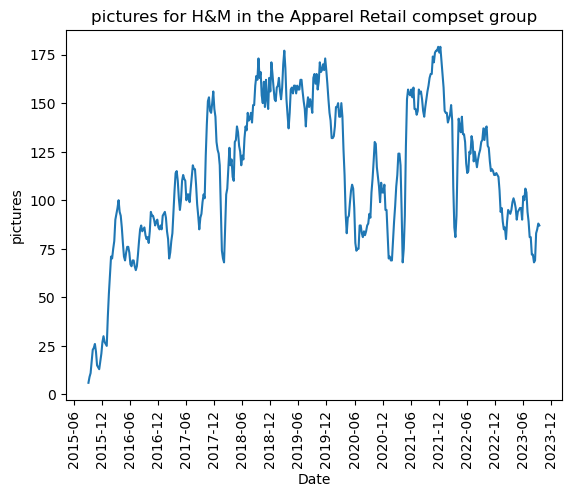

In [14]:
plot_brand(data, brand='H&M', compset='Apparel Retail', metric='pictures')

In [15]:
def plot_brand(data, brand='Versace', compset='Soft Luxury', metric='likes', num_pictures='num_pictures'):
    # Extraire les lignes pour la marque et le compset spécifiés et les trier par 'period_end_date', puis tracer la métrique au fil du temps
    subset = data[(data['business_entity_doing_business_as_name'] == brand) & (data['compset'] == compset)]
    
    # Convertir 'period_end_date' en datetime
    subset.loc[:, 'period_end_date'] = pd.to_datetime(subset['period_end_date'])
    
    # Calculer les likes par image
    subset['likes_per_picture'] = subset[metric] / subset[num_pictures]
    
    subset = subset.sort_values('period_end_date')
    
    fig, ax = plt.subplots()
    ax.plot(subset['period_end_date'], subset['likes_per_picture'])
    
    # Définir le format de l'axe des x pour afficher une marque tous les 3 mois
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    # Rendre les labels de l'axe des x verticaux
    plt.xticks(rotation='vertical')
    plt.xlabel('Date')
    plt.ylabel('Likes per picture')
    plt.title(f'Likes per picture for {brand} in the {compset} compset group')
    plt.show()

/var/folders/05/j8j7r4js16sg2jyk3313_4lw0000gn/T/ipykernel_23283/373116670.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['likes_per_picture'] = subset[metric] / subset[num_pictures]


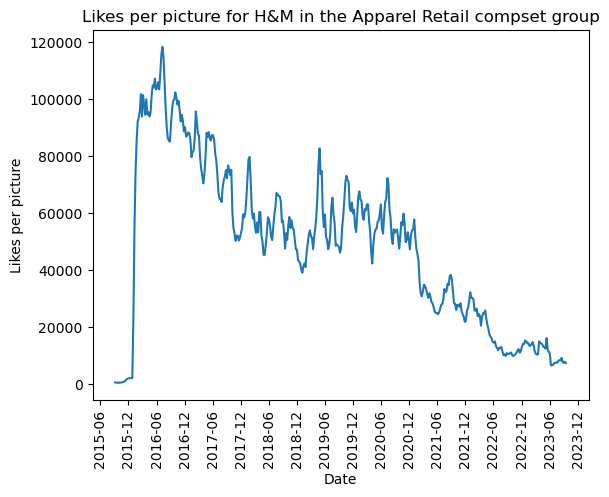

In [16]:
plot_brand(data, brand='H&M', compset='Apparel Retail', metric='likes', num_pictures='pictures')

/var/folders/05/j8j7r4js16sg2jyk3313_4lw0000gn/T/ipykernel_23283/373116670.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['likes_per_picture'] = subset[metric] / subset[num_pictures]


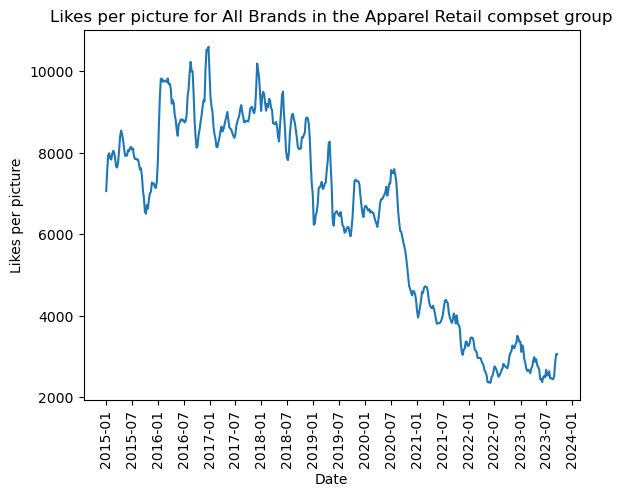

In [17]:
plot_brand(data, brand='All Brands', compset='Apparel Retail', metric='likes', num_pictures='pictures')

In [18]:
def plot_brands(data, brands=['Versace', 'Gucci'], compset='Soft Luxury', metric='likes', num_pictures='pictures', plot_difference=False):
    fig, axs = plt.subplots(2, 1, sharex=True) if plot_difference else plt.subplots(1, 1)
    axs = [axs] if not plot_difference else axs
    subsets = []
    
    for brand in brands:
        subset = data[(data['business_entity_doing_business_as_name'] == brand) & (data['compset'] == compset)].copy()  # Créer une copie explicite ici
        subset.loc[:, 'period_end_date'] = pd.to_datetime(subset['period_end_date'])
        subset['likes_per_picture'] = subset[metric] / subset[num_pictures]
        subset['likes_per_picture'] = (subset['likes_per_picture'] - subset['likes_per_picture'].min()) / (subset['likes_per_picture'].max() - subset['likes_per_picture'].min())
        subset = subset.sort_values('period_end_date')
        subsets.append(subset)
        axs[0].plot(subset['period_end_date'], subset['likes_per_picture'], label=brand)
    
    if plot_difference and len(subsets) == 2:
        difference = subsets[1]['likes_per_picture'].values - subsets[0]['likes_per_picture'].values
        axs[1].plot(subsets[0]['period_end_date'], difference, label='Difference')
        axs[1].set_ylabel('Difference')
        axs[1].legend()
    
    axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation='vertical')
    axs[0].set_ylabel('Normalized likes per picture')
    axs[0].set_title(f'Normalized likes per picture for different brands in the {compset} compset group')
    axs[0].legend()
    plt.show()

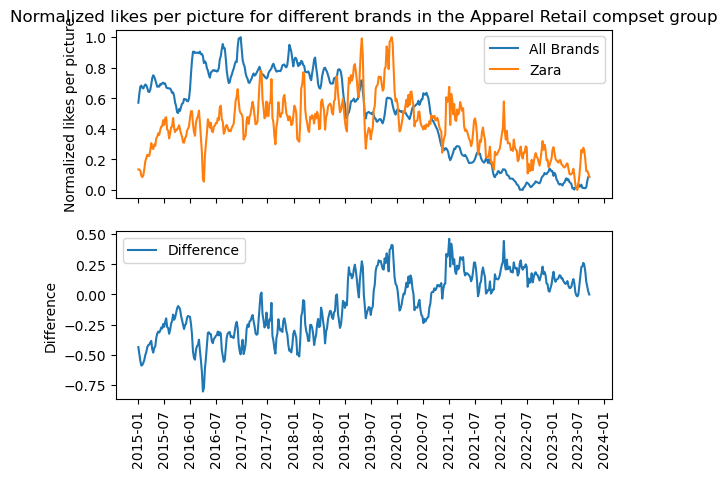

In [19]:
plot_brands(data, brands=['All Brands', 'Zara'], compset='Apparel Retail', metric='likes', num_pictures='pictures', plot_difference=True)

In [20]:
def legal_entity_summary(data, legal_entity='Capri Holdings'):
    # Take a legal_entity and display all business_entity_doing_business_as_name
    # Calculate total likes, comments, followers, pictures, and videos for the legal_entity for each timestamp
    subset = data[data['legal_entity_name'] == legal_entity]
    summary = subset.groupby('period_end_date').agg({
        'likes': 'sum',
        'comments': 'sum',
        'followers': 'sum',
        'pictures': 'sum',
        'videos': 'sum'
    }).reset_index()  # Ajoutez .reset_index() ici
    return summary

    
def plot_entity(data, summary, entity, brand='All brands', compset='Soft Luxury', metric='likes', num_pictures='pictures', plot_difference=False):
    fig, axs = plt.subplots(2, 1, sharex=True) if plot_difference else plt.subplots(1, 1)
    axs = [axs] if not plot_difference else axs

    subset = data[(data['business_entity_doing_business_as_name'] == brand) & (data['compset'] == compset)].copy()  # Créer une copie explicite ici
    subset.loc[:, 'period_end_date'] = pd.to_datetime(subset['period_end_date'])
    subset['likes_per_picture'] = subset[metric] / subset[num_pictures]
    subset['likes_per_picture'] = (subset['likes_per_picture'] - subset['likes_per_picture'].min()) / (subset['likes_per_picture'].max() - subset['likes_per_picture'].min())
    subset = subset.sort_values('period_end_date')
    axs[0].plot(subset['period_end_date'], subset['likes_per_picture'], label=brand)

    summary.loc[:, 'period_end_date'] = pd.to_datetime(summary['period_end_date'])
    summary = summary.sort_values('period_end_date')
    summary['likes_per_picture'] = summary['likes'] / summary['pictures']
    summary['likes_per_picture'] = (summary['likes_per_picture'] - summary['likes_per_picture'].min()) / (summary['likes_per_picture'].max() - summary['likes_per_picture'].min())
    axs[0].plot(summary['period_end_date'], summary['likes_per_picture'], label=entity)
    
    if plot_difference:
        difference = summary['likes_per_picture'].values - subset['likes_per_picture'].values
        axs[1].plot(summary['period_end_date'], difference, label='Difference')
        axs[1].set_ylabel('Difference')
        axs[1].legend()
    
    axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation='vertical')
    axs[0].set_ylabel('Normalized likes per picture')
    axs[0].set_title(f'Normalized likes per picture for different brands in the {compset} compset group')
    axs[0].legend()
    plt.show()

In [32]:
legal_entity_summary(data, legal_entity='Inditex')

,period_end_date,likes,comments,followers,pictures,videos


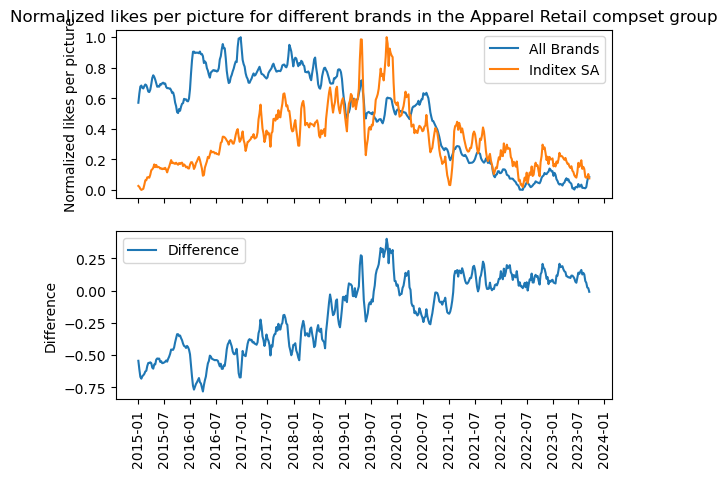

In [35]:
plot_entity(data, legal_entity_summary(data, legal_entity='Inditex SA'), 'Inditex SA', brand='All Brands', compset='Apparel Retail', metric='likes', num_pictures='pictures', plot_difference=True)

In [23]:
#Find unique values in legal_entity_name and ultimate_parent_legal_entity_name and print the differences
legal_entity_names = data['legal_entity_name'].unique()
ultimate_parent_legal_entity_names = data['ultimate_parent_legal_entity_name'].unique()
print(set(legal_entity_names) - set(ultimate_parent_legal_entity_names))
print(set(ultimate_parent_legal_entity_names) - set(legal_entity_names))


{'New Balance', "Natura;L'Oreal", 'Lactalis', 'Wingstop Inc', 'Casper', 'Taco Bell', 'Goodwill Industries of Orange County', 'Lidl', 'Outback Steakhouse', 'Fitness & Lifestyle Group Topco Pty Ltd', 'Hering', 'Ultimate Fitness Group LLC', 'Vince Holding Corp', 'Anthropologie', 'Premier Brands', 'Valentino', 'Brunello Cucinelli SpA', 'Barneys New York', 'Funko Holdings LLC', 'RTIC Outdoors LLC', 'Saks Fifth Avenue', 'JD Sports', 'Heineken', 'Popeyes', 'Finish Line', 'TGI Fridays', "Nando's", 'New Guards Group Holding SPA', 'Dudalina SA', 'Helix Sleep Inc', 'Campari', 'Merz Pharma GmbH Co KGaA', 'Parkwood Topshop Athletic;Parkwood Entertainment, LLC', 'Oatly', "L'Occitane International SA", "Chili's", 'KFC', 'Standard Industries Inc', 'Allergan', 'Suunto Oy', 'LongHorn Steakhouse', 'Canada Goose', 'Sonic', 'Gruppo Coin SpA', "Applebee's", 'Ultracor Inc', 'Patagonia, Inc.', 'Avon Products Inc', 'iFIT', 'Juicy Couture', 'Natura', 'J Crew', 'Audemars Piguet Holding SA', 'Academy Sports + Out

In [5]:
# Print an example row where legal_entity_name is 'Prada'
print(data[data['legal_entity_name'] == 'LVMH Moet Hennessy Louis Vuitton SE'].head(3))


       period period_end_date                  compset_group  \
10712  Weekly      2020-05-02  Luxury & Premium & Mainstream   
10713  Weekly      2021-09-18  Luxury & Premium & Mainstream   
10714  Weekly      2015-03-21  Luxury & Premium & Mainstream   

                                    compset  \
10712                           Soft Luxury   
10713         Luxury & Premium & Mainstream   
10714  Global Luxury Analysts Interest List   

      business_entity_doing_business_as_name  \
10712                          Louis Vuitton   
10713                          Louis Vuitton   
10714                          Louis Vuitton   

                         legal_entity_name domicile_country_name  \
10712  LVMH Moet Hennessy Louis Vuitton SE                France   
10713  LVMH Moet Hennessy Louis Vuitton SE                France   
10714  LVMH Moet Hennessy Louis Vuitton SE                France   

         ultimate_parent_legal_entity_name primary_exchange_name  \
10712  LVMH Moet Hen